## Hypothesis
To predict the incentive level requested to shut down or raise 5 degrees during the summer

DV: IncAwayS

IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg


In [96]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];



#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$AwaySNY==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwayW"       "BillS"      
 [11] "BillW"       "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"    
 [16] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"  
 [21] "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"     
 [26] "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"    
 [31] "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"     
 [36] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [41] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [46] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [51] "HabitG"      "HomeS"       "HomeW"       "HouseholdS"  "INT1"       
 [56] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [61] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [66] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [71] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [76] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [81] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [86] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [91] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [96] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
[101] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[106] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[111] "X.9to5"

In [97]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "17"   
[1] "AwayW" "33"   
[1] "IncWD" "38"   
[1] "IncDish" "141"    
[1] "Age" "3"  
[1] "Income" "2"     
[1] "Educ" "4"   
[1] "Latitude" "18"      
[1] "Summer_avgF" "28"         
[1] "Winter_avgF" "28"         
[1] "Summer_avgC" "28"         
[1] "Winter_avgC" "28"         
[1] "Summer_avg" "28"        
[1] "Winter_avg" "28"        


In [98]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 562 107
[1] 507 107


In [99]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
 [81] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [86] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [91] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [96] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[101] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[106] "Winter_avgF" "X.9to5"

In [100]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Attitude",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avgF",     
"HomeS",
"CashYN")

In [101]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
 [81] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [86] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [91] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [96] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[101] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[106] "Winter_avgF" "X.9to5"

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF" "Trust"

In [102]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncAwayS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF"

In [103]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [104]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [105]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncAwayS"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "Attitude"    "PBC"        
[16] "CashYN"      "MC"          "ComfNS"      "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Summer_avgF"

In [106]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [107]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.85
Summer_avgF,-0.85,1.00


In [108]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC Attitude   PBC    MC SubNorm HabitG HabitC
PC1  -0.21   -0.38    -0.42 -0.22 -0.33   -0.35   -0.3  -0.28
[1] 0.23
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.28 0.34    0.47     0.49       0.23   0.38
[1] 0.32
    HomeS Latitude ComfNS Summer_avgF
PC3 -0.27     0.56  -0.23       -0.56
[1] 0.39
    HomeS  Age Gender HouseholdS Ethnic Educ HabitC
PC4  0.23 0.22  -0.34      -0.52   0.36  0.4   0.26
[1] 0.45
    Political Ethnic Income  Educ EnergyC  PBC   MC HabitG
PC5      -0.5   0.21   -0.2 -0.41   -0.23 0.32 0.25   0.36
[1] 0.5
    IncAwayS   Age Ethnic EnergyC Attitude   PBC CashYN ComfNS   SN HabitC
PC6    -0.29 -0.29   -0.2    -0.2    -0.21 -0.21  -0.48  -0.25 0.25   0.41
[1] 0.54
    IncAwayS Age Gender Ethnic ComfNS
PC7    -0.57 0.3   0.23   0.33   0.49
[1] 0.59
     Age Gender Ethnic Income Educ CashYN ComfNS SubNorm   SN
PC8 -0.2  -0.33  -0.21   0.29 0.22   0.52   0.32     0.2 0.41
[1] 0.63
    HomeS IncAwayS Ethnic    MC SubNorm   SN
PC9

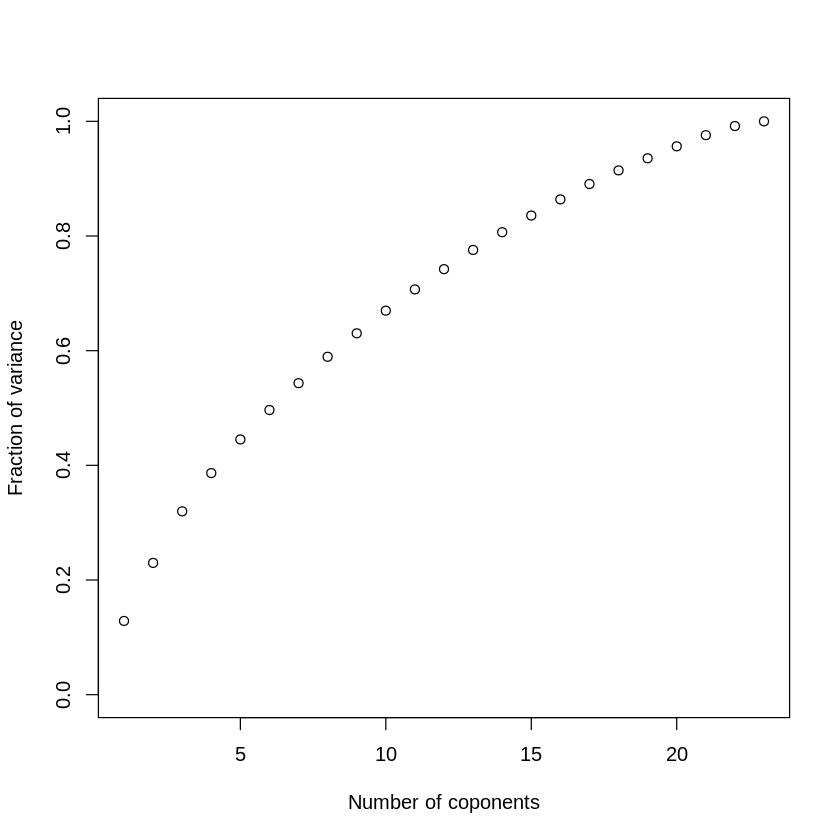

In [109]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [110]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [111]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,23,0.66
Latitude,12,0.65
Attitude,14,0.46
EnergyC,13,0.42
SqftCate,6,0.38
OwnRent,5,0.33
HouseholdS,7,0.27
Income,10,0.26
SubNorm,19,0.26
MC,17,0.25
HabitG,21,0.23


In [112]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncAwayS         Age      Gender     OwnRent    SqftCate 
       0.86        0.98        1.00        0.90        1.00        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.00        0.93        0.97        0.98        0.99        0.34 
    EnergyC    Attitude         PBC      CashYN          MC      ComfNS 
       0.51        0.40        0.93        1.00        0.79        0.94 
    SubNorm          SN      HabitG      HabitC Summer_avgF 
       0.75        0.93        0.85        0.89        0.04 

Loadings:
            Factor1 Factor2
EnergyC      0.70          
Attitude     0.76          
Latitude            -0.81  
Summer_avgF          0.98  
HomeS                0.38  
IncAwayS                   
Age                        
Gender       0.30          
OwnRent                    
SqftCate                   
HouseholdS                 
Political       

In [113]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [114]:
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm')

In [115]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [116]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.04  -2.31  -0.44   1.28  92.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.4621     3.3825    2.80   0.0054 **
Age          -0.0103     0.0323   -0.32   0.7502   
Income        0.0959     0.1936    0.50   0.6206   
Educ         -0.2920     0.3167   -0.92   0.3570   
OwnRent       0.9055     0.7692    1.18   0.2397   
SqftCate      0.2261     0.3591    0.63   0.5293   
EnergyC       0.1321     0.2988    0.44   0.6586   
MC            0.2515     0.3437    0.73   0.4647   
ComfNS       -0.5431     0.2399   -2.26   0.0240 * 
HabitC       -0.6334     0.2487   -2.55   0.0112 * 
Attitude     -0.8334     0.3884   -2.15   0.0324 * 
PBC           0.5720     0.3755    1.52   0.1284   
SubNorm       0.1238     0.2751    0.45   0.6529   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.4 on 494 degrees of freedom
Multiple R

In [117]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3,1.3,0.024,0.878
Income,1,39.1,39.1,0.706,0.401
Educ,1,72.4,72.4,1.307,0.254
OwnRent,1,137.7,137.7,2.486,0.115
SqftCate,1,13.7,13.7,0.247,0.620
EnergyC,1,30.9,30.9,0.558,0.455
MC,1,4.4,4.4,0.079,0.779
ComfNS,1,167.2,167.2,3.019,0.083
HabitC,1,360.4,360.4,6.506,0.011
Attitude,1,208.0,208.0,3.755,0.053


In [118]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
 -9.85  -1.99  -0.47   1.39  82.37 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.3672     4.2167    2.22   0.0273 * 
Age           0.0508     0.0419    1.21   0.2272   
Income       -0.0173     0.2382   -0.07   0.9420   
Educ         -0.2941     0.4141   -0.71   0.4783   
OwnRent      -0.0431     0.9416   -0.05   0.9635   
SqftCate      0.5243     0.4586    1.14   0.2543   
EnergyC      -0.2382     0.4052   -0.59   0.5573   
MC            0.1830     0.4516    0.41   0.6856   
ComfNS       -0.3491     0.3052   -1.14   0.2539   
HabitC       -1.0215     0.3219   -3.17   0.0017 **
Attitude     -0.9273     0.4931   -1.88   0.0613 . 
PBC           1.0319     0.4769    2.16   0.0316 * 
SubNorm       0.1606     0.3608    0.45   0.6567   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.3 on 219

In [119]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,57.0,57.0,1.4531,0.2293
Income,1,2.6,2.6,0.0668,0.7963
Educ,1,61.9,61.9,1.5783,0.2103
OwnRent,1,11.9,11.9,0.3029,0.5826
SqftCate,1,72.0,72.0,1.8346,0.1770
EnergyC,1,289.2,289.2,7.3730,0.0071
MC,1,0.2,0.2,0.0051,0.9429
ComfNS,1,21.1,21.1,0.5388,0.4637
HabitC,1,373.0,373.0,9.5095,0.0023
Attitude,1,97.8,97.8,2.4927,0.1158


In [130]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.292 -1.467 -0.134  1.557  4.559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.20558    1.17875    2.72   0.0069 ** 
Age          0.01587    0.01122    1.41   0.1583    
Income      -0.03538    0.06200   -0.57   0.5687    
Educ         0.08190    0.10473    0.78   0.4348    
OwnRent     -0.03456    0.25746   -0.13   0.8933    
SqftCate    -0.00278    0.11997   -0.02   0.9816    
EnergyC     -0.10660    0.09863   -1.08   0.2806    
MC          -0.09715    0.11873   -0.82   0.4138    
ComfNS       0.43207    0.08425    5.13  5.1e-07 ***
HabitC      -0.13979    0.08422   -1.66   0.0979 .  
Attitude    -0.00414    0.13500   -0.03   0.9756    
PBC         -0.08942    0.12624   -0.71   0.4793    
SubNorm      0.08671    0.09329    0.93   0.3534    
CashYNTRUE   0.93146    0.41301    2.26   0.0248 *  
---
Signif. codes:  0 '***' 

In [121]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.9e+01,48.515,1.9214,0.1665
Income,1,8.5e-02,0.085,0.0034,0.9537
Educ,1,6.0e+01,59.767,2.3671,0.1247
OwnRent,1,2.3e+00,2.272,0.0900,0.7644
SqftCate,1,1.9e+01,18.695,0.7404,0.3901
EnergyC,1,1.9e+02,185.847,7.3605,0.0070
MC,1,4.1e-01,0.409,0.0162,0.8988
ComfNS,1,4.3e-01,0.427,0.0169,0.8966
HabitC,1,2.6e+02,255.090,10.1029,0.0016
Attitude,1,1.0e+02,102.751,4.0695,0.0444


In [122]:
#add CashYN to model
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [123]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.14  -2.29  -0.48   1.23  92.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.4019     3.4945    2.40    0.017 *
Age          -0.0116     0.0323   -0.36    0.719  
Income        0.0854     0.1937    0.44    0.660  
Educ         -0.3009     0.3166   -0.95    0.342  
OwnRent       0.9344     0.7692    1.21    0.225  
SqftCate      0.2388     0.3591    0.67    0.506  
EnergyC       0.1324     0.2987    0.44    0.658  
MC            0.2306     0.3439    0.67    0.503  
ComfNS       -0.5543     0.2400   -2.31    0.021 *
HabitC       -0.6123     0.2492   -2.46    0.014 *
Attitude     -0.8475     0.3884   -2.18    0.030 *
PBC           0.5593     0.3755    1.49    0.137  
SubNorm       0.1229     0.2750    0.45    0.655  
CashYNTRUE    1.4677     1.2229    1.20    0.231  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.4

In [124]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3,1.3,0.024,0.878
Income,1,39.1,39.1,0.706,0.401
Educ,1,72.4,72.4,1.308,0.253
OwnRent,1,137.7,137.7,2.488,0.115
SqftCate,1,13.7,13.7,0.247,0.620
EnergyC,1,30.9,30.9,0.559,0.455
MC,1,4.4,4.4,0.079,0.779
ComfNS,1,167.2,167.2,3.022,0.083
HabitC,1,360.4,360.4,6.512,0.011
Attitude,1,208.0,208.0,3.759,0.053


In [125]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
 -9.97  -1.97  -0.46   1.41  82.22 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   8.4910     4.4430    1.91   0.0573 . 
Age           0.0531     0.0421    1.26   0.2090   
Income       -0.0319     0.2396   -0.13   0.8944   
Educ         -0.3180     0.4164   -0.76   0.4458   
OwnRent      -0.0451     0.9429   -0.05   0.9619   
SqftCate      0.5317     0.4594    1.16   0.2484   
EnergyC      -0.2047     0.4092   -0.50   0.6174   
MC            0.1523     0.4548    0.33   0.7381   
ComfNS       -0.3396     0.3059   -1.11   0.2683   
HabitC       -1.0172     0.3224   -3.15   0.0018 **
Attitude     -0.9720     0.4988   -1.95   0.0526 . 
PBC           1.0448     0.4780    2.19   0.0299 * 
SubNorm       0.1699     0.3615    0.47   0.6390   
CashYNTRUE    1.0973     1.7313    0.63   0.5269   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

In [126]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,57.0,57.0,1.4492,0.2300
Income,1,2.6,2.6,0.0666,0.7965
Educ,1,61.9,61.9,1.5740,0.2110
OwnRent,1,11.9,11.9,0.3021,0.5831
SqftCate,1,72.0,72.0,1.8296,0.1776
EnergyC,1,289.2,289.2,7.3528,0.0072
MC,1,0.2,0.2,0.0051,0.9430
ComfNS,1,21.1,21.1,0.5373,0.4643
HabitC,1,373.0,373.0,9.4835,0.0023
Attitude,1,97.8,97.8,2.4859,0.1163


In [129]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.292 -1.467 -0.134  1.557  4.559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.20558    1.17875    2.72   0.0069 ** 
Age          0.01587    0.01122    1.41   0.1583    
Income      -0.03538    0.06200   -0.57   0.5687    
Educ         0.08190    0.10473    0.78   0.4348    
OwnRent     -0.03456    0.25746   -0.13   0.8933    
SqftCate    -0.00278    0.11997   -0.02   0.9816    
EnergyC     -0.10660    0.09863   -1.08   0.2806    
MC          -0.09715    0.11873   -0.82   0.4138    
ComfNS       0.43207    0.08425    5.13  5.1e-07 ***
HabitC      -0.13979    0.08422   -1.66   0.0979 .  
Attitude    -0.00414    0.13500   -0.03   0.9756    
PBC         -0.08942    0.12624   -0.71   0.4793    
SubNorm      0.08671    0.09329    0.93   0.3534    
CashYNTRUE   0.93146    0.41301    2.26   0.0248 *  
---
Signif. codes:  0 '***' 

In [128]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.9e+01,48.515,1.9212,0.1665
Income,1,8.5e-02,0.085,0.0034,0.9537
Educ,1,6.0e+01,59.767,2.3668,0.1248
OwnRent,1,2.3e+00,2.272,0.0900,0.7644
SqftCate,1,1.9e+01,18.695,0.7403,0.3901
EnergyC,1,1.9e+02,185.847,7.3595,0.0070
MC,1,4.1e-01,0.409,0.0162,0.8988
ComfNS,1,4.3e-01,0.427,0.0169,0.8966
HabitC,1,2.6e+02,255.090,10.1016,0.0016
Attitude,1,1.0e+02,102.751,4.0689,0.0444
